In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
bikeB = pd.read_csv("bike_buyers.csv")

In [3]:
bikeB

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [4]:
bikeB.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [5]:
#No se encontraron datos duplicados
bikeB.duplicated().value_counts()

False    1000
dtype: int64

<AxesSubplot:xlabel='Marital Status', ylabel='Income'>

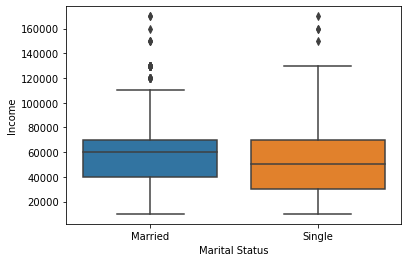

In [6]:
sb.boxplot(x="Marital Status",y="Income",data=bikeB)

In [7]:
#Limpieza de la columna gender
bikeB2 =bikeB.copy()

#L = list()
#L=bikeB2[bikeB2["Gender"].isnull()]["ID"].values

bikeB2.loc[bikeB2['Gender'].isna(),"Gender"]= [i for i in np.random.choice(bikeB2[bikeB2["Gender"].isnull()==False]["Gender"].unique(), bikeB2['Gender'].isna().sum())]

#para revisar los datos reemplazados
#for ID in L:
  # print (bikeB2[bikeB2["ID"]==ID]["Gender"])

#bikeB.iloc[99]["Gender"]

In [8]:
#Limpieza de la Columna Edad
bikeB2["Age"]=bikeB2["Age"].fillna(value=bikeB2["Age"].median())

#bikeB2.info()

In [9]:
#Limpieza de la columna Income
bikeB2["Income"]=bikeB2["Income"].fillna(value=bikeB2["Income"].mean())



In [10]:
#Limpieza de la columna Children

bikeB2.loc[bikeB2["Children"].isna(),"Children"]= [i for i in np.random.choice([0,1,2,3,4,5], bikeB2["Children"].isna().sum())]


In [11]:
#Limpieza de la columna Marital Status
bikeB2.loc[bikeB2["Marital Status"].isna(),"Marital Status"]= [i for i in np.random.choice(bikeB2[bikeB2["Marital Status"].isnull()==False]["Marital Status"].unique(), bikeB2['Marital Status'].isna().sum())]


In [12]:
#Limpieza de la columna Car
bikeB2.loc[bikeB2["Cars"].isna(),"Cars"]= [i for i in np.random.choice([0,1,2,3,4], bikeB2["Cars"].isna().sum())]

In [13]:
#Limpieza de la columna HomeOwner
bikeB2.loc[bikeB2["Home Owner"].isna(),"Home Owner"]=[i for i in np.random.choice(bikeB2[bikeB2["Home Owner"].isnull()==False]["Home Owner"].unique(), bikeB2["Home Owner"].isna().sum())]


In [14]:
# Segmentar Commute Distance

#['0-1 Miles', '2-5 Miles', '5-10 Miles', '1-2 Miles', '10+ Miles']

bikeB2["New Commute Distance"] = bikeB2["Commute Distance"].replace({"0-1 Miles":"Minimal","1-2 Miles":"Short","2-5 Miles":"Moderate","5-10 Miles":"Long","10+ Miles":"Extensive"})


In [15]:
#¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

MeanIncomePB=bikeB2[["Income","Purchased Bike"]].groupby("Purchased Bike")
MeanIncomePB.mean()

,Income
Purchased Bike,
No,54874.759152
Yes,57770.489883


In [16]:
#¿Cuánto es el promedio de ingresos según el estado civil del cliente?
MeanIncomeMS=bikeB2[["Income","Marital Status"]].groupby("Marital Status")
MeanIncomeMS.mean()

,Income
Marital Status,
Married,58640.897429
Single,53503.902201


In [38]:
#Creamos una nueva columna que indique con el valor 1 si es que tiene hijos, y el valor 0 si es que no tiene hijos
bikeB2["Con_Hijos"]=np.where(bikeB2["Children"]>0,1,0)


In [46]:
Mean_N_hijosXEdu = bikeB2[["Children","Education"]].groupby("Education")
Mean_N_hijosXEdu.mean()

,Children
Education,
Bachelors,1.931373
Graduate Degree,2.017241
High School,1.960894
Partial College,1.867925
Partial High School,1.605263


<AxesSubplot:xlabel='Education', ylabel='Children'>

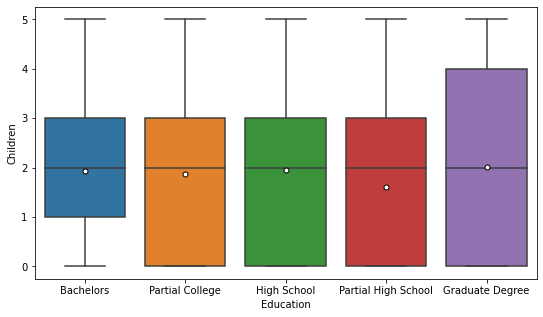

In [74]:
plt.figure(figsize=(9,5))
sb.boxplot(x="Education",y="Children",data=bikeB2,showmeans=True,meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'5'})

In [75]:
#Creamos una nueva columna que indique con el valor 1 si es que el cliente tiene vehiculo, y 0 si no tiene
bikeB2["Con_vehiculo"]=np.where(bikeB2["Cars"]>0,1,0)

In [84]:
Mean_VehixCli = bikeB2[["Occupation","Cars"]].groupby("Occupation")
Mean_VehixCli.mean()

,Cars
Occupation,
Clerical,0.836158
Management,2.167630
Manual,1.050420
Professional,1.717391
Skilled Manual,1.309804


<AxesSubplot:xlabel='Occupation', ylabel='Cars'>

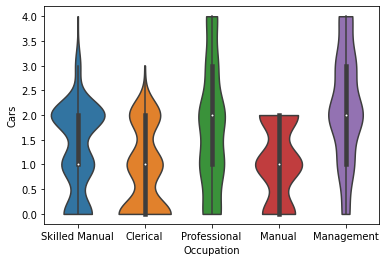

In [156]:

sb.violinplot(x="Occupation",y="Cars",data=bikeB2,cut=0)

In [97]:
#Promedio de edad de acuerdo si el cliente es o no es dueño de una casa
HomeOwnerxAge = bikeB2[["Home Owner","Age"]].groupby("Home Owner")
HomeOwnerxAge.mean()


,Age
Home Owner,
No,42.310127
Yes,45.032164


<AxesSubplot:xlabel='Home Owner', ylabel='Age'>

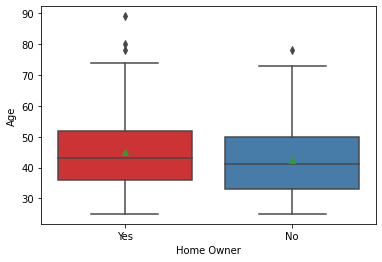

In [179]:

sb.boxplot(data=bikeB2,x="Home Owner",y="Age",palette="Set1",showmeans=True)
